### What is seaborn?

Seaborn is a library for making seamless graphical representations of data in Python.It gives Matplotlib (also a data visualization library) a high-level interface and tightly interacts with Pandas data structures. Pandas is a library with data manipulation capabilities.

#### Why Seaborn?
Understanding trends in data and making the most of the data require visualizations. Python's Matplolib is used mostly for visualization purposes. However, one of the main drawbacks of Matplotlib is how much code is required to create even the most basic graphical representation. Seaborn streamlines the procedure by providing functionalities that enable thorough exploratory analysis with minimal coding.

#### Advantages of Seaborn

1. Seaborn makes it easy to translate questions about data inot graphics.
2. Rapid prototyping and exploratory data analysis are made easier by seaborn.
3. It can be used to create polished, presentation-worthy figures.
4. It is rich in functionality for plot specialization.
5. It offers many more specialized customization possibilities.

#### Basic plotting with relplot()

Like scatter plot, we can do basic plottings by using `sns.relplot()` function and indicating what goes into the x and y axes as well as the DataFrame to use. Additionaly, `relplot()` takes a parameter that specifies the kind of plot to use. If no plot is specified, scatterplot is used as the default plot.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


penguins_df = sns.load_dataset("penguins")
penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

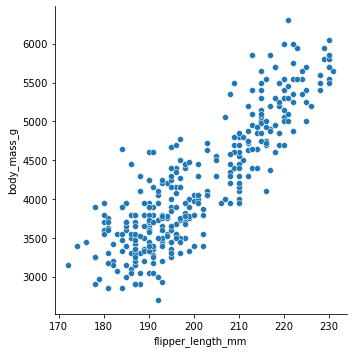

In [2]:
# plot the relationship between flipper length and body mass

sns.relplot(x="flipper_length_mm",
           y="body_mass_g",
           data = penguins_df)
plt.show()

#### Grouping data points by species

The points are shown in two dimensions; however, a third dimension can be added by coloring the points in accordance with a third variable. This is known as utilizing a "hue semantic" in Seaborn because the color of the point acquires meaning.

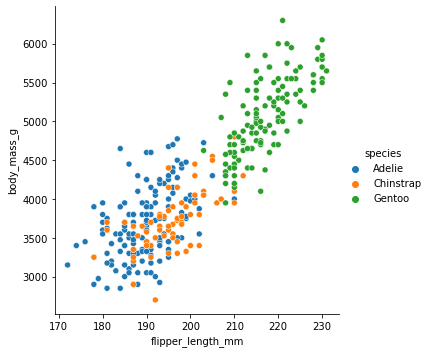

In [3]:
# plot the relationship between flipper length and body mass

sns.relplot(x="flipper_length_mm",
           y="body_mass_g",
           data = penguins_df,
           hue = "species")
plt.show()

##### Subplots with Seaborn

One of the most crucial components of visualization is the subplot. For the time being, we can only plot a single graph; the concept of subplot is useful when the goal is to display multiple graphs at once. 

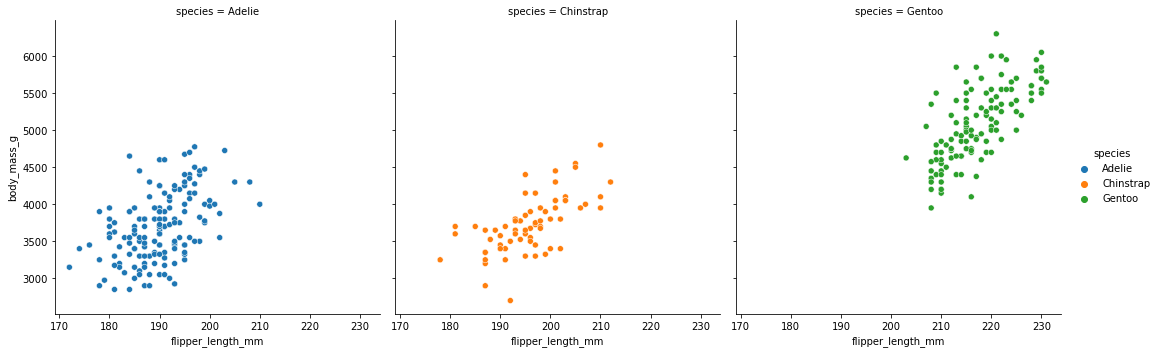

In [4]:
sns.relplot(x="flipper_length_mm",
           y="body_mass_g",
           data = penguins_df,
           hue = "species",
           col = "species")
plt.show()

#### Using line plot with Seaborn

In order to use line plot as a relational plot, we'll se the `kind` parameter to `line`. By default, if the `kind` is not specified, we'll have a scatter plot. The data we are using here is a historical data that contains the opening prices of three stocks namely Microsoft, Apple, and Tesla. The data has a `Date` column which is the corresponding date for stock values and another price column representing movement of opening stock prices from October 2021 to April 2022.

To read our data, we are going to use `read_csv` method from pandas and parse the date by setting `parse_date` arguement to date, this will is to tell Pandas to treat the Date column as TimeIndex.

In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data and five random rows
stock_df = pd.read_csv("stock_data.csv", parse_dates=["Date"])
stock_df.sample(5)

Date Stock       Price
49  2021-12-09  MSFT  334.410004
272 2021-09-30  AAPL  781.000000
52  2021-12-14  MSFT  333.220001
20  2021-10-28  MSFT  324.329987
387 2022-03-16  AAPL  809.000000

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    408 non-null    datetime64[ns]
 1   Stock   408 non-null    object        
 2   Price   408 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.7+ KB


In [6]:
stock_df.Stock.unique()

array(['MSFT', 'TSLA', 'AAPL'], dtype=object)

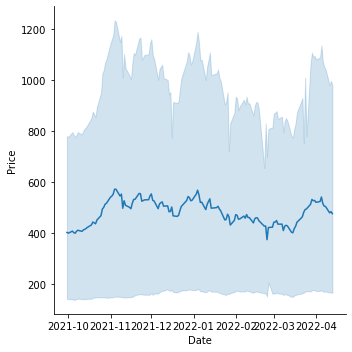

In [7]:
# plot with seaborn
sns.relplot(x = "Date",
           y = "Price",
           data = stock_df,
           kind = "line")
plt.show()

#### Subsets by stock
Just like the scatterplot, the line plot can also show up to three additional variables by modifying the hue, size, and style of the plot elements. We can as track the changes overtime by observing the price for each stock (Apple, tesla, and Microsoft) for each date. We can do this by setting the `style` and `hue` parameters to `stock`.

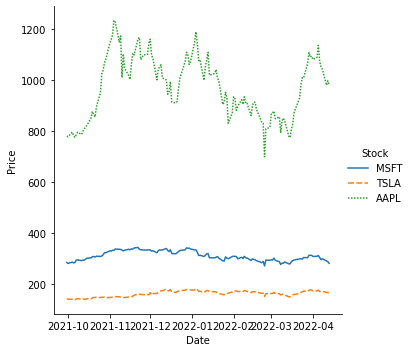

In [7]:
sns.relplot(x = "Date",
           y = "Price",
           data = stock_df,
           kind = "line",
           style = "Stock",
           hue = "Stock")
plt.show()

Setting the `size` and `hue` parameters to `Stock` creates line with different style an color. We can observe here that Apple (AAPL) has higher stock values while Tesla (TSLA) has the lowest value. 

#### Identifying subsets using Markers

We can identify subsets by the markers used at each observation, either together with the dashes or instead of them: We do this by setting the `marker` parameter to `True`.

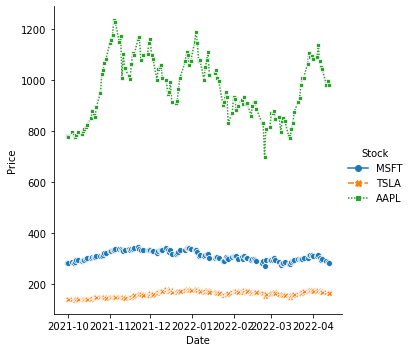

In [8]:
sns.relplot(x = "Date",
           y = "Price",
           data = stock_df,
           kind = "line",
           style = "Stock",
           hue = "Stock",
           markers = True)
plt.show()

#### Variable Aggregration with Seaborn

Due to the complexity of the data where the prices of each stock were taken repeatedly over a period of time, Seaborn uses special aggregrating functions which allows multiple measurements (prices in this case) at each data value. The default behavior is by plotting the mean and the 95% confidence interval around the mean

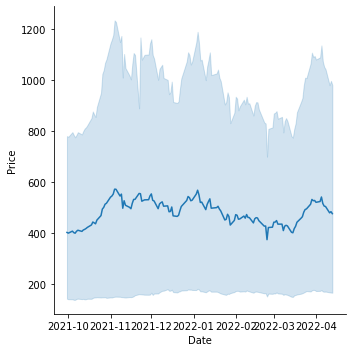

In [9]:
sns.relplot(x = "Date",
           y = "Price",
           data = stock_df,
           kind = "line")
plt.show()

#### Aggregration without confidence interval

Because the confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them. We do this by setting the `ci` parameter to `None`

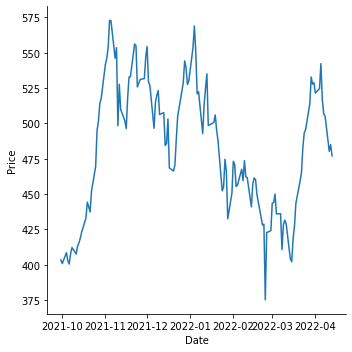

In [10]:
sns.relplot(x = "Date",
           y = "Price",
           data = stock_df,
           kind = "line",
           ci = None)
plt.show()

### Visualizing a Categorical and a Quantitative variable with Seaborn

In the previous chapters, we have explored how we can use different features of Seaborn to visualize the relationship between quantitative variables.  If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization. Therefore, in this chapter, we'll focus on using Seaborn to visualize categorical variables.

#### Plotting with categorical data

In Seaborn, there are several ways to visualize a relationship involving categorical data. A categorical variable is one which describes a particular quality or characteristic and can be sorted into categories. We can use plots such as count plots, catplot, bar plot, box plot etc for visualizing categorical data. When we want to compare different groups, we frequently utilize these kinds of plots.

#### Categorical plot

In the same way that we created various relational plot types using `relplot()`, in this chapter we will develop several categorical plot kinds using `catplot()`. Because `catplot()` offers accessibility to charts using a range of options in thesame manner as `relplot()`, making subplots with the same `col` and `row` parameters will be simple to do if necessary. Using the titanic data, there are lots of questions to ask and relationships between variables to explore.

#### Count plot

Count plot is used to Show the counts of observations in each categorical bin using bars. When the goal is to display the number of observations in each category rather than calculating a statistic for a second variable, a bar plot is a special case for this. To demonstrate the use of count plot, we'll use the titanic dataset to show the total count of the passengers that embarked in different city. We do this by plotting `embark_town` on the x axis while setting the `kind` parameter to `count`. Alternatively, we can use `sns.countplot` without having to specify the `kind` of the plot.

In [11]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



titanic_df = sns.load_dataset('titanic')
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

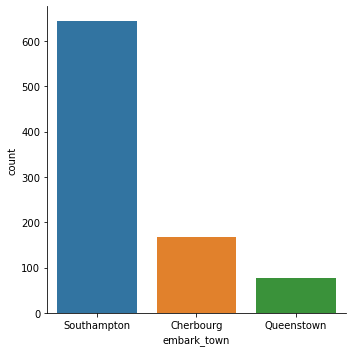

In [12]:
sns.catplot(x="embark_town",
           kind="count",
           data=titanic_df)
plt.show()

We can see that majority of the passengers embarked in Southampton

#### Count plot with hue

We can further break down the observations by category by using the `hue` parameter. We do this by setting `hue` to the name of the variable that we want to use. Here, let's investigate the count of the passengers that embarked in different city, seperated by sex. To do this, we set `hue` to `sex`.

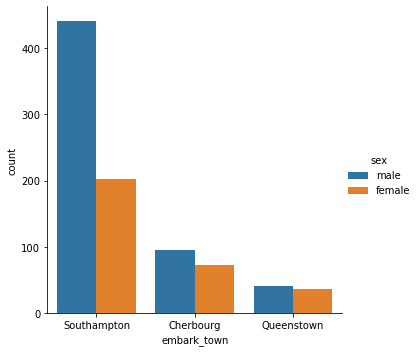

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = "embark_town",
           kind ="count",
           data = titanic_df,
           hue = "sex")
plt.show()

#### Bar plot

Rather than showing the distribution within each category, bar plot is used to show an estimate of the central tendency of the values. Let's say we were interested in knowing the __average__ fare price of passengers that embarked from different towns. We do this by plotting `embark_town` on the x axis and `fare` on y axis while setting the `kind` parameter to `bar`. Alternatively, we can use `sns.barplot` without having to specify the `kind` of the plot. By default, Seaborn will take the uses the mean for estimation, but you can use other measures of central tendency as well.

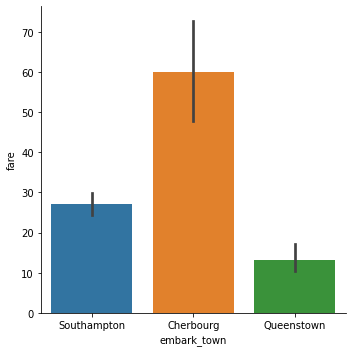

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.catplot(x = "embark_town",
            y = "fare",
           kind ="bar",
           data = titanic_df,
           )
plt.show()

There is a noticeable difference between Cherbourg and the other two, let’s separate the bars by class to see who was boarding in each town.

#### Bar plot with hue

As with count plot, we can further break down the observation by adding a third variable using the `hue` parameter. Here, we'll set the parameter to the `class` variable to enable us visualize who was boarding in each town.

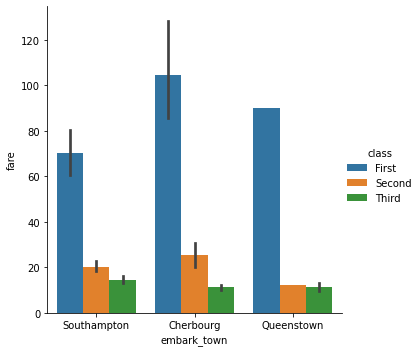

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = "embark_town",
            y = "fare",
           kind ="bar",
           data = titanic_df,
           hue = "class")
plt.show()

#### Box plot

We use the box plot for summarizing the distributional information in ways that facilitate easy comparisons across the category levels. The plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This indicates that each boxplot value represents a real observation in the data.

#### Creating a box plot

In order to demonstrate how a box plot is created with Seaborn, we'll continue with out titanic dataset. Using the `catplot` method, We want to observe the age distribution of passengers across the class by plotting the `class` on the x axis and `age` on y axis while setting the kind parameter to `box`. Alternatively, we can use sns.boxplot without having to specify the kind of the plot.

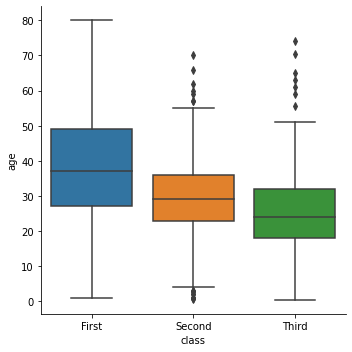

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.catplot(x = "class",
            y = "age",
           kind ="box",
           data = titanic_df,
           )
plt.show()

As you can see, age tends to decrease as you move down the passenger class, as can be shown. It makes sense because young people typically travel on a tight budget.

#### SKipping the outliers in box plot

Data points that are far from other data points are known as outliers. In other words, they represent unusual dataset values. For many statistical analyses, outliers are an issue because they can either cause tests to miss important findings or to distort actual results. In order to skip them from box plot visuals, we can skip them by setting the `sym` parameter to empty string (i.e "").

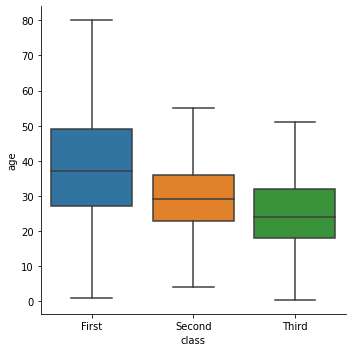

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = "class",
            y = "age",
            kind ="box",
            data = titanic_df,
            sym = ""
           )
plt.show()

##### Exercise: Did older passengers aboard the Titanic pay a higher fare?

In this exercise, we are going to explore the titanic dataset using Seaborn. The RMS Titanic, which was widely believed to be "unsinkable," perished on April 15, 1912, after striking an iceberg while on her first voyage. Unfortunately, there were not enough lifeboats to accommodate everyone, and 1502 out of 2224 passengers and crew died. The titanic dataset consists of features related to a passenger and the response is if a passenger survived the titanic disaster or not. Using the Seaborn `load_dataset` method, create a DataFrame and give it a name `titanic_df`, display the first five rows and visualiza the relationship between `age` and `fare` using scattter plot. Distinguish the categories using the `sex` of the passengers.

##### Instructions
1. load the data into `titanic_df` using `load_dataset` method by specifying the name of the data as `titanic
2. Display the first five rows of the data
3. Make a scatter plot with `age` on the x axis and `fare` on the y axis using the DataFrame `titanic_df`. Color-code the plot using the `sex` column and use any Seaborn palette to cusomize the color.

##### Exercise: 

The tips dataset, which is being explored in this exercise, represents tips left at restaurants. The dataset in question consists of a record of tips provided together with the total bills of restaurant patrons that was reportedly gathered by a waitress over the course of several weeks of employment there. The dataset consists of various data categories that describe the tips that were given in relation to various factors, such as the day of the week, the tipper's gender, etc. Using count plot, let's display the number of observation of the `time` variable then explore whether or not the tipper is a smoker. To create a count plot, load the tips dataset from seaborn and store it in a dataframe called `tips_df`, then use the `catplot()` function indicate the `time` as the name of the categorical variable to plot while specifying the kind of plot as `count`.

##### Instructions
1. import the necessary libraries
2. Load the dataset using the `load_dataset` method with `tips` as the name of the dataset.
3. Display first five rows of the data using `head` method from Pandas
4. use `catplot()` and the loaded data and enter the `time` variable as the categorical variable. Enter `smoker` as the `hue` and set the `kind` of the plot to `count`.